# Analysis of Reggression Models on Tunnel Data

Objective is to analyze the performance of different regression models on given dataset.

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/TBM_S-210_Alptransit_Faido_East.jpg/1280px-TBM_S-210_Alptransit_Faido_East.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [2]:
df = pd.read_csv('./data/rock_density_xray.csv')

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rebound Signal Strength nHz,300.0,49.725766,28.341792,0.700227,25.685798,50.602886,74.854294,98.831658
Rock Density kg/m3,300.0,2.225063,0.314512,1.500000,1.987830,2.268597,2.476944,2.750000


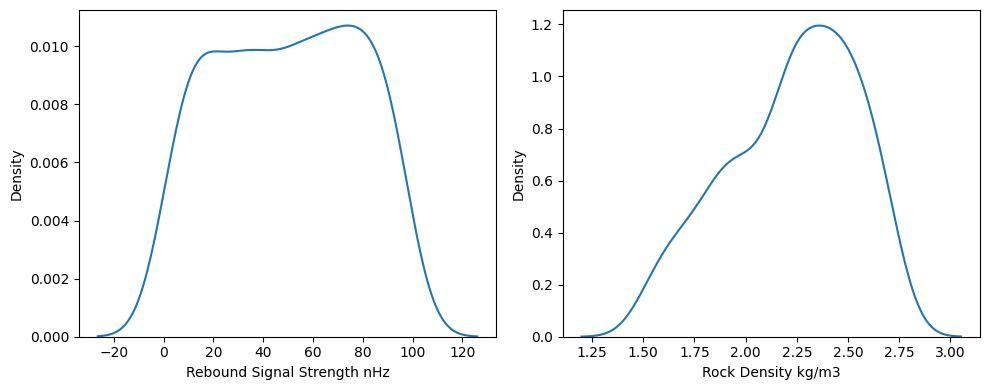

In [15]:
# kde plot for feature and label
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
sns.kdeplot(df['Rebound Signal Strength nHz'], ax=ax[0])
sns.kdeplot(df['Rock Density kg/m3'], ax=ax[1])
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

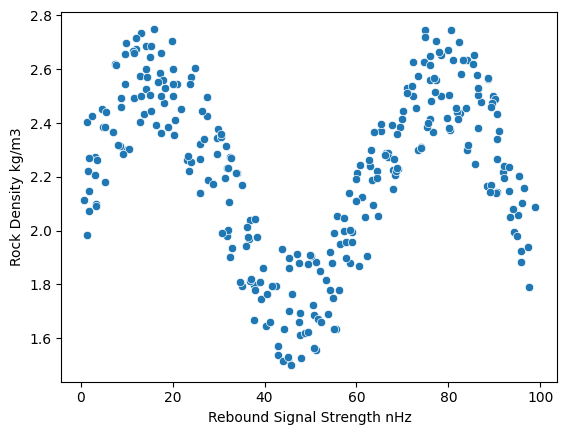

In [16]:
sns.scatterplot(data=df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3')

In [18]:
# correlation
df.corr()

,Rebound Signal Strength nHz,Rock Density kg/m3
Rebound Signal Strength nHz,1.0000,-0.0306
Rock Density kg/m3,-0.0306,1.0000


### Regression Models

Running the dataset on different regression models to evaluate and compare performances.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df['Rebound Signal Strength nHz']
# reshaping due to one feature
X = X.values.reshape(-1, 1)
y = df['Rock Density kg/m3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [4]:
# function to train and test all regression algorithms
def run_model(model, X_train, y_train, X_test, y_test):
    # fit/train
    model.fit(X_train, y_train)

    # predict
    pred = model.predict(X_test)
    # mae
    print(f"MAE :\t{mean_absolute_error(y_test, pred)}")
    # rmse
    print(f"RMSE :\t{np.sqrt(mean_squared_error(y_test, pred))}")

    # plot model prediction on dummy test
    test_input = np.arange(0, 100).reshape(-1, 1)
    pred_ = model.predict(test_input)

    sns.scatterplot(data=df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3', color='black')
    plt.plot(test_input, pred_)
    

#### Simple Linear Regression Model

MAE :	0.30342617897688157
RMSE :	0.3470161031770827


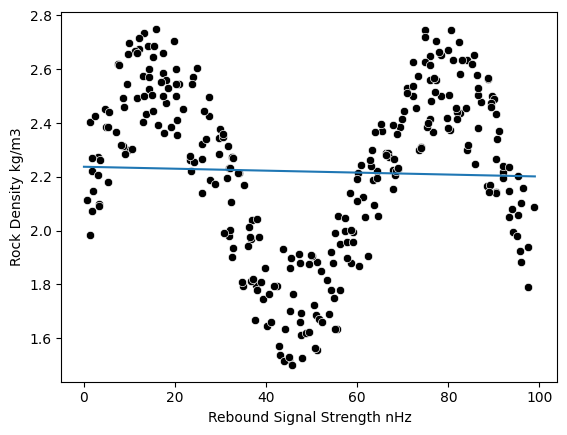

In [9]:
from sklearn.linear_model import LinearRegression

run_model(LinearRegression(), X_train, y_train, X_test, y_test)

#### Polynomial Regression Model

MAE :	0.264875577083005
RMSE :	0.2920009815326515
MAE :	0.26243878714575625
RMSE :	0.28723131304637617
MAE :	0.11682988266757958
RMSE :	0.14161913064792822


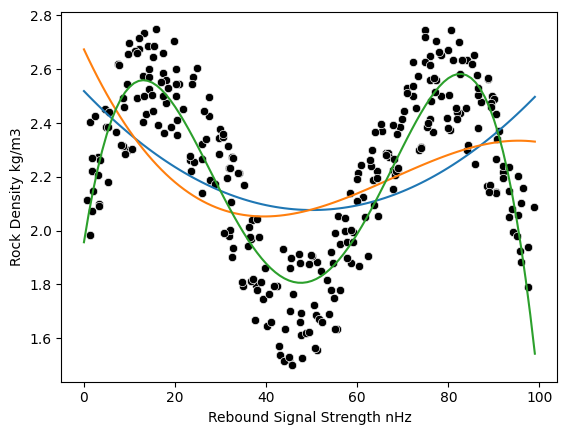

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for degree in range(2,5):
    pipe = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    run_model(pipe, X_train, y_train, X_test, y_test)

#### KNN Regressor

MAE :	0.11558454898804932
RMSE :	0.14816263549838016
MAE :	0.11132818662395327
RMSE :	0.13644210074889576
MAE :	0.11342019743645237
RMSE :	0.13952238850335036


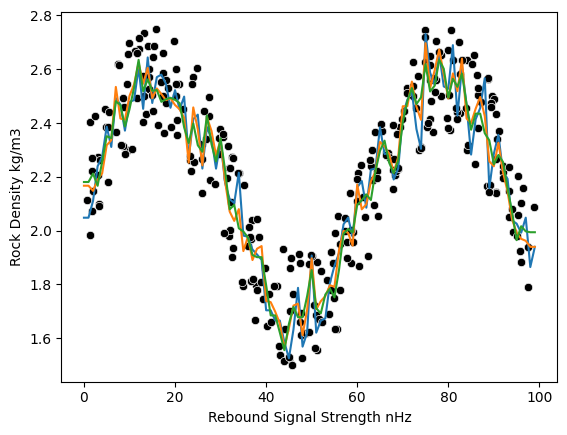

In [52]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = [2,3,4]
for neighbor in n_neighbors:
    run_model(KNeighborsRegressor(n_neighbors=neighbor), X_train, y_train, X_test, y_test)

#### SVM Regressor

MAE :	0.1072432509009957
RMSE :	0.12591722874252662


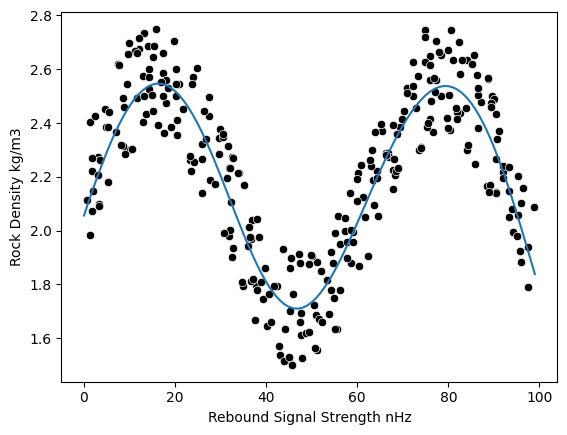

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 5, 10, 50, 100],
              'gamma':['scale', 'auto']}

grid_mdl = GridSearchCV(SVR(), param_grid)

run_model(grid_mdl, X_train, y_train, X_test, y_test)

#### Decision Tree Regressor

MAE :	0.13355921434511836
RMSE :	0.16797288442769362


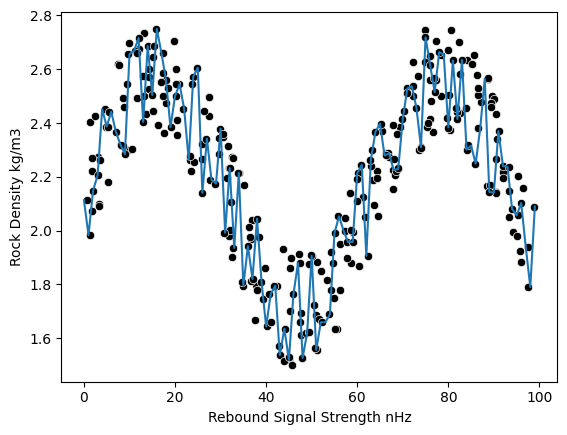

In [5]:
from sklearn.tree import DecisionTreeRegressor

run_model(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

#### Random Forest Regressor

MAE :	0.11667126896753527
RMSE :	0.14522812696659296


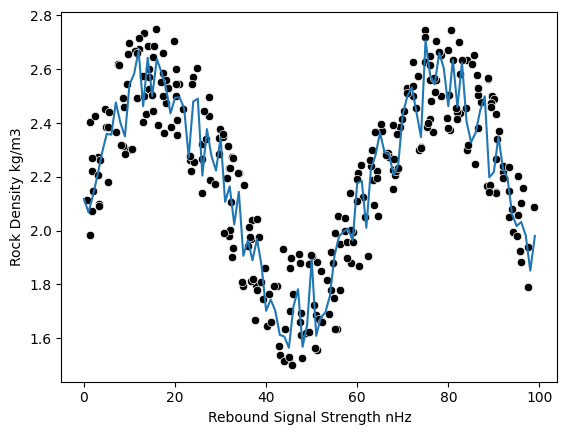

In [6]:
from sklearn.ensemble import RandomForestRegressor

run_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

### Conclusion

* Linear Regression:
    * Despite having good MAE and RMSE values, plots shows that the model fails to capture the underlying trend and adds a lot of bias with low variance.
* Polynomial Regression:
    * Increasing the degree allows the model to fit the data well with low bias and acceptable variance.
* *KNN:
    * Although captures the underlying trend, the models also takes in a lot of noise (increased variance)
* SVR:
    * With correct hyper-parameter values, the model is able to fit the data and generalize well.
* Decision Tree Methods:
    * Decision Tree based methods (including Random Forest) understand the underlying trend but also adjust some level of noise into the model.